# Advanced Python Techniques

In this Notebook we will be covering a lot more advanced python techniques and tricks that will greatly help out you out in whatever task you set to accomplish. We will explore special packages and their use, and demostrate the power that these python libraries and functions have. 

# 1. Curve Fitting

One very important thing that often times when in industry or doing research or what have you is to make predictions about that is going to happen. This can be part of the stock market or financial trends. But at the basic core of this curve fitting module is that we have some sort of model and we have data but we do not know what the parameters for the model is that best fits our data. With curve_fit we can get just that, by giving curve_fit a model and data points curve_fit will use some advanced mathematics (linear least square fitting) to find the best parameters that fit the data. But with curve_fit there are a little bit of nuances with how it works and how to interpret the output it brings back. 

In [1]:
from scipy.optimize import curve_fit

## 1.1  Defining a Model
---

When using curve_fit you need to have a predefined function to pass into curve fit for it to fit and this is where one of the peculiarities of curve_fit comes to play. If your data is the x variable then what curve fit expects when you define the function is that the first variable is x. For example take the equation of a line f(x) = mx + b.


To code this up so that curve fit will fit the parameters m and b we need to define it like so:

    def line(x, m, b):
    
If you try to mix m and b around like this:

    def line(m, x, b):
    def line(m, b, x):
    def line(b, m, x):
    
Or any other combination then what curve_fit will do is treat the first input as your x data. So be sure that when you are making your function that the x is the first argument in your function declaration. 

## 1.2 Giving curve_fit good initial guesses

---

I cannot stress the importance of this feature enough. If you provide curve_fit with bad initial guesses on the parameters you are trying to fit then it will either return back an error saying could not find optimal parameter values or it will try to fit it and give back weird answers. This is why giving it good guesses is important, they do not need to be spot on, but close enough that curve_fit can converge onto the right value. 

## 1.3 Giving curve_fit a range of values to explore
---

Another input into curve_fit that will save you time and energy is the bounds input. This input puts a limit as to how far to explore the parameter space for the optimal parameter by giving it a lower bound and an upper bound. Thus, curve_fit will only look within that range and see if it can converge onto a good parameter. 

## 1.4 curve_fit in action

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# making a line 
x = np.linspace(0, 10, 20)
y = 4*x + 3

#making some noise to add to the line data
noise = np.random.normal(scale = 3, size = 20)

noisy_data = y + noise

In [4]:
%matplotlib inline

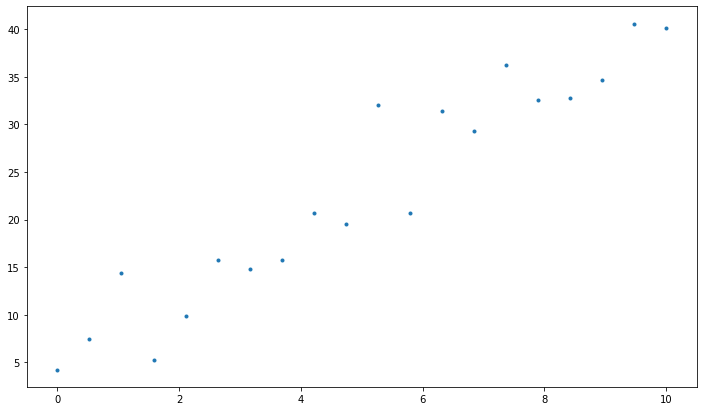

In [5]:
plt.figure(figsize = (12, 7))
plt.plot(x, noisy_data, '.')
plt.show()

In [6]:
#Defining model 
def Line(x, m, b):
    return m*x + b

In [7]:
#first output param is the best fit parmaetr values for m, b
#if you had more it woul dgive it to you in the order of your function 
#defintion so if you defined function as Line(x, b, m) then 
#param would be the best fit values of b and m in that order
param, pcov = curve_fit(Line, x, noisy_data, p0 = [5, 2.5])

In [8]:
param

array([3.62344009, 4.79289304])

In [9]:
#this is the covariance matrix on the parameters curve fit found it is a of 
#getting uncertainty on the parameter values by looking at the diagonal
pcov

array([[ 0.0693259 , -0.34662949],
       [-0.34662949,  2.37167552]])

In [10]:
#this gives the relative error in the optimal parameter m and b respectively
pcov.diagonal()

array([0.0693259 , 2.37167552])

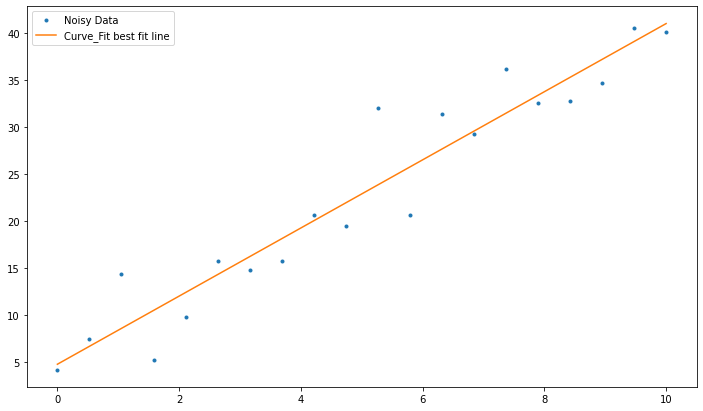

In [11]:
plt.figure(figsize = (12, 7))
#Original Noisy Data
plt.plot(x, noisy_data, '.', label = 'Noisy Data')
#curve fit line
plt.plot(x, Line(x, *param), label = 'Curve_Fit best fit line')
plt.legend()
plt.show()

In [12]:
#This can be used on more complex functions too

x_exp = np.linspace(0, 10, 100)
y_exp = 5 * np.exp(-x_exp/5)

exp_noise = np.random.normal(scale = 1, size = 100)

noisy_exp_data = y_exp + exp_noise

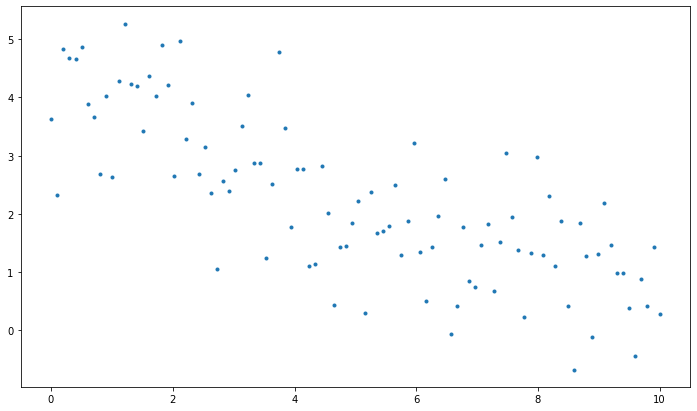

In [13]:
plt.figure(figsize = (12, 7))
plt.plot(x_exp, noisy_exp_data, '.')
plt.show()

In [14]:
#defining model
def exponential_decay(x, C_0, tau):
    
    return C_0 * np.exp(-x/tau)

In [15]:
param_exp, pcov_exp = curve_fit(exponential_decay, x_exp, noisy_exp_data, p0=[4, 6])

In [16]:
param_exp

array([4.60614975, 5.98232306])

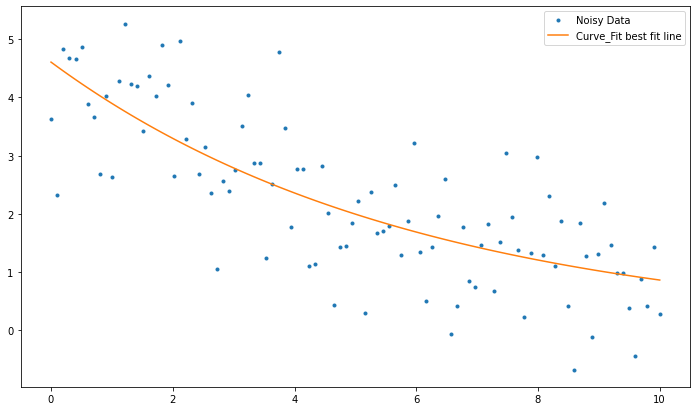

In [17]:
plt.figure(figsize = (12, 7))
#Original Noisy Data
plt.plot(x_exp, noisy_exp_data, '.', label = 'Noisy Data')
#curve fit line
plt.plot(x_exp, exponential_decay(x_exp, *param_exp), label = 'Curve_Fit best fit line')
plt.legend()
plt.show()

# 2. Using Python Scripts to Clean Up Your Notebooks

So far we have been talking about using jupyter notebooks to do all your science but you can also use python scrupts to help reduce clutter in your notebooks and to keep track of your functions. The way we would make a Python script is by opening and making a new text file. Go to the home page of the jupyter notebook, click new and select the text file. This should open up a blank text file for us to use. In the title call the script whatever you want but make sure to put a .py at the end of it. In this directory you should see a .py script called and all this has is a lot of import statements and a code block to stylize your plots. This is a neat thing to have around because if you find yourself constantly importing the same packages when you make a new notebook it may be better to write them to a script and import that script.

In [18]:
#Let's import that python script

from imports import *

In [19]:
#You can also put functions into python scripts and import them as you would a package then
#you can use them inside of Jupyter Notebooks

from Research_Functions import *

In [20]:
Hipparcos_DF = reading_file('hipparcos_voidmain.csv')

In [21]:
Hipparcos_DF.head()

,HIP,Catalog,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,1,H,NaN,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,...,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
1,2,H,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,...,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
2,3,H,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,...,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
3,4,H,NaN,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,...,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
4,5,H,NaN,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,...,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2


# 3. Knowing Astropy

It has very useful packages and functions aside from reading fits files. If you go to the coordinates class it has a very useful function called SkyCoord which allows you to do cross matching of catalogs really easily. It also has tons of functions to manipulate images to get cutouts and changing the scaling in the images to make the data really pop. You also have access to the cosmology package which allows you to compute with ease lots of cosmological measurements. Many of the functions you will need to code up for the Hogg paper are here. There is also a very useful and convenient units package that allows you to keep track of the units and easily convert from one unit to another with relative ease. 

# Units

Units are a great way to easily convert between different units with ease. No longer do we have to worry about messign up the conversion factor as all of that tedious stuff is taken care of with Astropy units. Let's us see some examples of it in use in the cells below.

You can read more about them here: https://docs.astropy.org/en/stable/units/

In [22]:
#to add the units to a value you need to multiply the units in and then perform the neccesary operations the units
#require 
#below we are trying to get the units of the speed of light so we need to multiply this by meter/second
c = 3e8 * u.m/u.second

In [23]:
print(c)

300000000.0 m / s


In [24]:
#let's say that we are doing some calculation where we need c in units of Angstroms / second
#you could find the conversion factor and apply it but let's try to use astropy units to help us out

#for this we will be use the .to() method for variables that have astropy units, then put the new units
#you want to convert to, note that the units must be the same item, we cannot convert meters to Joules for example
#because meter is a measure of length and Joules is a measure of energy

c_angstrom = c.to(u.Angstrom/u.s)

In [25]:
print(c_angstrom)

2.9999999999999995e+18 Angstrom / s


In [26]:
#Let's do one with E = m c^2

mass_array = np.array([1, 12, 32, 45, 111, 23, 2, 55]) * u.kg

In [27]:
E = mass_array * c**2

In [28]:
E

<Quantity [9.00e+16, 1.08e+18, 2.88e+18, 4.05e+18, 9.99e+18, 2.07e+18,
           1.80e+17, 4.95e+18] kg m2 / s2>

In [29]:
#we can see that E has the units of m^2 kg/s^2 which is a unit of energy so if we want to see how many eV's this 
#is we would use the .to() method to convert this to eV

E.to(u.eV)

<Quantity [5.61735817e+35, 6.74082980e+36, 1.79755461e+37, 2.52781118e+37,
           6.23526757e+37, 1.29199238e+37, 1.12347163e+36, 3.08954699e+37] eV>

In [30]:
#Same thing but with Joules

E.to(u.Joule)

<Quantity [9.00e+16, 1.08e+18, 2.88e+18, 4.05e+18, 9.99e+18, 2.07e+18,
           1.80e+17, 4.95e+18] J>

In [31]:
#one unit that we will see used extensively in the next section are angular units like degrees, arcminute and 
#arcseconds

degree = 1*u.degree

degree

<Quantity 1. deg>

In [32]:
arcsecond = degree.to(u.arcsec)

arcsecond

<Quantity 3600. arcsec>

In [33]:
arcmin = degree.to(u.arcmin)

arcmin

<Quantity 60. arcmin>

# SkyCoord

SkyCoord is a great function in astropy and is super helpful whenever you need to cross match between two catalog using their location on the sky. Let us take a look at an example of using SkyCoord to find the nearest matches between two catalogs.

You can read more about SkyCoord here: https://docs.astropy.org/en/stable/coordinates/index.html and 
                                       https://docs.astropy.org/en/stable/coordinates/matchsep.html

In [34]:
RA1 = np.random.normal(loc = 270, scale = 1e-2, size = 1000)
DEC1 = np.random.normal(loc = 72, scale = 1e-2, size = 1000)

RA2 = np.random.normal(loc = 270, scale = 5e-2, size = 500)
DEC2 = np.random.normal(loc = 72, scale = 5e-2, size = 500)

In [35]:
#Let us use skycoord objects to find the closest match

#making our skycoord objects
skycoord1 = SkyCoord(ra = RA1, dec = DEC1, unit = 'degree')
skycoord2 = SkyCoord(ra = RA2, dec = DEC2, unit = 'degree')

In [36]:
# we want to match the smallest catalog to the larger one so that is why we are using 
#skycoord2 and matching entries form skycoord1 to it

#We use the match_to_catalog_sky function which returns 3 things
#It first returns the index in skycoord 1 that is the closest match to the entry in skycoord2 for every
#entry in skycoord2
#it gives us the 2d separation on the sky, this has units and you can easily change from degree to arcseconds
#it also gives us the physical 3d distance but for it to be accurate we need the redshift which we did not provide
#So we ignore the sep3d
idx, sep2d, sep3d = skycoord2.match_to_catalog_sky(skycoord1)

In [37]:
#We only want really close matches so we will convert the sep2d from degrees to arcseconds and
#apply a separation threshold to find the closest objects

#Converts sep2d from degrees to arcseconds
sep_mask = sep2d.arcsec < 3 #this is saying we want separation to be less than 3 arcseconds

#we then apply sep_mask to the skycoord2 array, the idx_array 
matched_skycoord2 = skycoord2[sep_mask]

#this gives us only the indexes where the match was below 3 arcseconds
matched_idx_skycoord1 = idx[sep_mask]

#we then apply those indexes to subselect only those in skycoord 1 that met the criteria
matched_skycoord1 = skycoord1[matched_idx_skycoord1]

#applied mask to the separation
matched_sep = sep2d[sep_mask]


In [38]:
print('All the close matches between the two catalogs')
print()
for sky1, sky2, sep in zip(matched_skycoord1, matched_skycoord2, matched_sep.arcsec):
    
    print(f'{sky1.ra:.3f}, {sky1.dec:.3f} -------- {sky2.ra:.3f}, {sky2.dec:.3f}--------- {sep}')

All the close matches between the two catalogs

269.998 deg, 72.016 deg -------- 269.998 deg, 72.016 deg--------- 0.7910443151875849
269.985 deg, 71.993 deg -------- 269.984 deg, 71.993 deg--------- 1.1454269287519898
270.014 deg, 71.999 deg -------- 270.015 deg, 71.999 deg--------- 0.28309465558995706
270.003 deg, 72.014 deg -------- 270.003 deg, 72.015 deg--------- 2.598449005754109
270.014 deg, 72.012 deg -------- 270.015 deg, 72.013 deg--------- 2.161304706709254
270.012 deg, 71.990 deg -------- 270.011 deg, 71.990 deg--------- 0.6017872356516677
269.991 deg, 71.982 deg -------- 269.990 deg, 71.982 deg--------- 0.9995233057464626
269.985 deg, 71.994 deg -------- 269.986 deg, 71.993 deg--------- 1.7127298407893008
269.999 deg, 71.996 deg -------- 269.999 deg, 71.996 deg--------- 1.4104190677993746
269.983 deg, 71.986 deg -------- 269.983 deg, 71.986 deg--------- 1.1295142247711776
269.990 deg, 71.992 deg -------- 269.989 deg, 71.991 deg--------- 1.7839840905110127
269.987 deg, 71.99

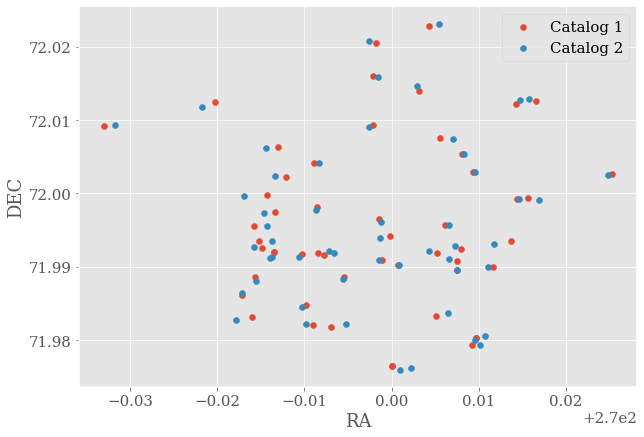

In [39]:
plt.figure(figsize = (10, 7))
plt.scatter(matched_skycoord1.ra, matched_skycoord1.dec, label = 'Catalog 1')
plt.scatter(matched_skycoord2.ra, matched_skycoord2.dec, label = 'Catalog 2')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend()
plt.show()

# Cosmology

If you ever find yourself needing to compute some sort of cosmological parameter or measurement chance are that astropy has something in their cosmology package. Let's demonstrate some of the stuff covered in the package.

You can learn more about it here: https://docs.astropy.org/en/stable/cosmology/index.html

In [40]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

In [41]:
#You can compute the luminosity distance at redshift 4
cosmo.luminosity_distance(4)  

<Quantity 35842.35296334 Mpc>

In [42]:
#It also takes an array of values
cosmo.luminosity_distance(np.array([0, 1, 2, 3, 4, 5, 6])) 

<Quantity [    0.        ,  6607.05286426, 15537.03732027, 25417.16919028,
           35842.35296334, 46638.06910725, 57708.9196625 ] Mpc>

In [43]:
#or the age of the universe at a given redshift
cosmo.age(0)  

<Quantity 13.4617013 Gyr>

In [44]:
#can also pass in arrays
cosmo.age(np.array([0, 1, 2, 3, 4, 5, 6]))  

<Quantity [13.4617013 ,  5.74698021,  3.22268165,  2.10909255,  1.51293339,
            1.15196544,  0.9144007 ] Gyr>

In [45]:
#you can get the comoving distance
cosmo.comoving_distance(np.array([0.5, 1.0, 1.5]))  

<Quantity [1888.53777335, 3303.52643213, 4363.28597879] Mpc>

In [46]:
#You can also get the distance modulus ata given redshift 
cosmo.distmod(5)

<Quantity 48.34370281 mag>

In [47]:
#You can also get the distance modulus at a given redshift 
cosmo.distmod(np.array([0.1, 1, 2, 3, 4 , 5]))

<Quantity [38.31518552, 44.10003891, 45.95684104, 47.0256359 , 47.77198256,
           48.34370281] mag>

# Formal Introduction to Pandas and Pandas DataFrames

Pandas is the package if you are working with data in a tabular form, it is easily able to subselect section of the data frame, apply conditionals to filter out the data and is able to manipulate data using mathematical operations. In this section we will go over some of the basic uses fo Pandas to help get you familiar with it. 

The first thing that we will need to go over is the structure of a Pandas DataFrame as this is the main data format that the tabular data will be in. It has row and column unique indexers that we need to specify to access the data. Let's look at some examples of making a pandas DataFrame and accessing the contents of the DataFrame.

In [48]:
import pandas as pd

In [49]:
empty_DF = pd.DataFrame()

In [50]:
empty_DF

""


In [51]:
#You can populate Dataframes with 2D arrays 

twod_arr = np.random.normal(size = (5, 4))

DF = pd.DataFrame(twod_arr, columns = ['Column 1', 'Column 2', 'Column 3', 'Column 4'], index = ['Row1', "Row2", 
                                                                                            
                                                                                             "Row3",  "Row4",  
                                                                                            "Row5"])

In [52]:
DF

,Column 1,Column 2,Column 3,Column 4
Row1,-0.199803,0.100443,-0.069695,0.417144
Row2,-0.794941,1.261663,0.284787,2.134708
Row3,-0.831570,-0.916586,-0.900672,-0.331185
Row4,-1.234906,-0.045515,-0.691451,0.079352
Row5,1.367276,1.073942,1.032318,0.152610


## Accessing Values

You can access values using the row-column pairing and using the .loc (short for locate) in the DataFrame. 

DF.loc[Row_Key, Column_Key]

In [53]:
DF.loc['Row1', 'Column 4']

0.41714399756780635

In [54]:
#these can even be multiple values but you need to pass them as list or arrays
DF.loc[['Row1', 'Row3', 'Row5'], ['Column 2', 'Column 4']]

,Column 2,Column 4
Row1,0.100443,0.417144
Row3,-0.916586,-0.331185
Row5,1.073942,0.152610


# Mathematical Operation

The mathematical operations for DataFrames are the exact same as for 2D arrays everything that we learned there is easily transferable to pandas DataFrames.

In [55]:
DF * 4

,Column 1,Column 2,Column 3,Column 4
Row1,-0.799211,0.401772,-0.278782,1.668576
Row2,-3.179764,5.046650,1.139149,8.538834
Row3,-3.326282,-3.666343,-3.602687,-1.324741
Row4,-4.939622,-0.182059,-2.765802,0.317408
Row5,5.469104,4.295766,4.129270,0.610439


In [56]:
DF / 0.01

,Column 1,Column 2,Column 3,Column 4
Row1,-19.980271,10.044301,-6.969538,41.714400
Row2,-79.494111,126.166261,28.478733,213.470843
Row3,-83.157041,-91.658565,-90.067164,-33.118515
Row4,-123.490551,-4.551484,-69.145051,7.935203
Row5,136.727607,107.394162,103.231761,15.260983


In [57]:
DF + 43

,Column 1,Column 2,Column 3,Column 4
Row1,42.800197,43.100443,42.930305,43.417144
Row2,42.205059,44.261663,43.284787,45.134708
Row3,42.168430,42.083414,42.099328,42.668815
Row4,41.765094,42.954485,42.308549,43.079352
Row5,44.367276,44.073942,44.032318,43.152610


In [58]:
DF - 1.43

,Column 1,Column 2,Column 3,Column 4
Row1,-1.629803,-1.329557,-1.499695,-1.012856
Row2,-2.224941,-0.168337,-1.145213,0.704708
Row3,-2.261570,-2.346586,-2.330672,-1.761185
Row4,-2.664906,-1.475515,-2.121451,-1.350648
Row5,-0.062724,-0.356058,-0.397682,-1.277390


In [59]:
DF - 1.43

,Column 1,Column 2,Column 3,Column 4
Row1,-1.629803,-1.329557,-1.499695,-1.012856
Row2,-2.224941,-0.168337,-1.145213,0.704708
Row3,-2.261570,-2.346586,-2.330672,-1.761185
Row4,-2.664906,-1.475515,-2.121451,-1.350648
Row5,-0.062724,-0.356058,-0.397682,-1.277390


In [60]:
#Let's load in a more ocmplicated DataFrame and see soem other useful functions through that

Hipparcos_DF = pd.read_csv('hipparcos_voidmain.csv', index_col = 0)

In [61]:
#this command does a brief information on the DataFrame including the index, column names, if there is null values
#and the datatype of each column
Hipparcos_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118218 entries, 1 to 118322
Data columns (total 77 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Catalog    118218 non-null  object 
 1   Proxy      10925 non-null   object 
 2   RAhms      118218 non-null  object 
 3   DEdms      118218 non-null  object 
 4   Vmag       118217 non-null  float64
 5   VarFlag    11562 non-null   float64
 6   r_Vmag     118217 non-null  object 
 7   RAdeg      117955 non-null  float64
 8   DEdeg      117955 non-null  float64
 9   AstroRef   13734 non-null   object 
 10  Plx        117955 non-null  float64
 11  pmRA       117955 non-null  float64
 12  pmDE       117955 non-null  float64
 13  e_RAdeg    117955 non-null  float64
 14  e_DEdeg    117955 non-null  float64
 15  e_Plx      117955 non-null  float64
 16  e_pmRA     117955 non-null  float64
 17  e_pmDE     117955 non-null  float64
 18  DE:RA      117955 non-null  float64
 19  Plx:RA     117955 non-n

In [62]:
#describe does a quick sumamry statistic of each column that is able to have this done
#It does a full count of values, computes the mean, standard deviation (std), the min and max values
#and it does percentiles of the data in terms of 25th, 50th, 75th percentiles
Hipparcos_DF.describe().T #The .T command is the tranpose operator and switches columns to rows and rows to columns

,count,mean,std,min,25%,50%,75%,max
Vmag,118217.0,8.373233,1.312044,-1.440000,7.640000,8.440000,9.150000,14.080000
VarFlag,11562.0,1.739405,0.618728,1.000000,1.000000,2.000000,2.000000,3.000000
RAdeg,117955.0,181.466380,103.261685,0.000912,93.425334,181.969874,271.744455,359.978792
DEdeg,117955.0,-2.143250,41.016397,-89.782454,-36.636503,-1.945926,31.435615,89.569409
Plx,117955.0,7.215220,11.286095,-54.950000,2.510000,4.610000,8.410000,772.330000
pmRA,117955.0,-1.303405,98.199404,-4410.790000,-15.150000,-1.680000,11.840000,6767.260000
pmDE,117955.0,-16.599682,93.859400,-5813.000000,-21.740000,-5.650000,3.760000,10326.930000
e_RAdeg,117955.0,1.320787,4.123088,0.270000,0.670000,0.870000,1.170000,281.160000
e_DEdeg,117955.0,1.102270,3.430510,0.330000,0.590000,0.720000,0.920000,241.060000
e_Plx,117955.0,1.361105,1.779464,0.380000,0.880000,1.100000,1.390000,114.460000


In [63]:
#this command describes the datatype of the columns
Hipparcos_DF.dtypes

Catalog      object
Proxy        object
RAhms        object
DEdms        object
Vmag        float64
             ...   
CoD          object
CPD          object
(V-I)red    float64
SpType       object
r_SpType     object
Length: 77, dtype: object

In [64]:
#this is the command to see if there are empty values in your DataFrame and the it returns a boolean array
Hipparcos_DF.isnull()

,Catalog,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,AstroRef,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
HIP,,,,,,,,,,,,,,,,,,,,,
1,False,True,False,False,False,True,False,False,False,True,...,False,True,True,False,False,True,True,False,False,False
2,False,True,False,False,False,True,False,False,False,False,...,True,True,True,False,False,True,True,False,False,False
3,False,True,False,False,False,True,False,False,False,True,...,False,True,True,False,False,True,True,False,False,False
4,False,True,False,False,False,True,False,False,False,True,...,False,True,True,False,True,True,False,False,False,False
5,False,True,False,False,False,True,False,False,False,True,...,True,True,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118318,False,True,False,False,False,False,False,False,False,True,...,False,True,True,False,False,True,True,False,False,False
118319,False,True,False,False,False,True,False,False,False,True,...,False,True,True,False,True,False,False,False,False,False
118320,False,True,False,False,False,True,False,False,False,True,...,False,True,True,False,False,True,True,False,False,False


In [65]:
#We can count how many null values there are per column by using the sum after isnull()
Hipparcos_DF.isnull().sum()

Catalog          0
Proxy       107293
RAhms            0
DEdms            0
Vmag             1
             ...  
CoD          90338
CPD          77968
(V-I)red         0
SpType        3034
r_SpType      3034
Length: 77, dtype: int64

In [66]:
#this tells us is there is any missing data in the column
Hipparcos_DF.isna().any()

Catalog     False
Proxy        True
RAhms       False
DEdms       False
Vmag         True
            ...  
CoD          True
CPD          True
(V-I)red    False
SpType       True
r_SpType     True
Length: 77, dtype: bool

In [67]:
#this command gives you the index of the DataFrame
Hipparcos_DF.index

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            118313, 118314, 118315, 118316, 118317, 118318, 118319, 118320,
            118321, 118322],
           dtype='int64', name='HIP', length=118218)

In [68]:
#command gives you the columns of the DataFrame
Hipparcos_DF.columns

Index(['Catalog', 'Proxy', 'RAhms', 'DEdms', 'Vmag', 'VarFlag', 'r_Vmag',
       'RAdeg', 'DEdeg', 'AstroRef', 'Plx', 'pmRA', 'pmDE', 'e_RAdeg',
       'e_DEdeg', 'e_Plx', 'e_pmRA', 'e_pmDE', 'DE:RA', 'Plx:RA', 'Plx:DE',
       'pmRA:RA', 'pmRA:DE', 'pmRA:Plx', 'pmDE:RA', 'pmDE:DE', 'pmDE:Plx',
       'pmDE:pmRA', 'F1', 'F2', '---', 'BTmag', 'e_BTmag', 'VTmag', 'e_VTmag',
       'm_BTmag', 'B-V', 'e_B-V', 'r_B-V', 'V-I', 'e_V-I', 'r_V-I', 'CombMag',
       'Hpmag', 'e_Hpmag', 'Hpscat', 'o_Hpmag', 'm_Hpmag', 'Hpmax', 'HPmin',
       'Period', 'HvarType', 'moreVar', 'morePhoto', 'CCDM', 'n_CCDM', 'Nsys',
       'Ncomp', 'MultFlag', 'Source', 'Qual', 'm_HIP', 'theta', 'rho', 'e_rho',
       'dHp', 'e_dHp', 'Survey', 'Chart', 'Notes', 'HD', 'BD', 'CoD', 'CPD',
       '(V-I)red', 'SpType', 'r_SpType'],
      dtype='object')

In [69]:
#we can use iloc to use traditional python indexer to get values from the dataframe

random_indexes = np.random.randint(low = 0, high = Hipparcos_DF.shape[0], size = 10)


random_DF = Hipparcos_DF.iloc[random_indexes]

In [70]:
#this allows you to sort a DataFrame in ascending order based on certain columns
#in this case we are sorting by RA and DEC in ascending order
random_DF.sort_values(by = ['RAdeg', 'DEdeg'], ascending = True)

,Catalog,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,AstroRef,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
HIP,,,,,,,,,,,,,,,,,,,,,
19951,H,H,04 16 44.67,-44 17 37.8,9.00,NaN,H,64.186126,-44.293824,A,...,S,NaN,NaN,27317.0,NaN,C-44 1480,P-44 455,0.98,F6V,2
20146,H,NaN,04 19 07.94,+17 31 29.4,8.47,NaN,H,64.783078,17.524822,NaN,...,NaN,NaN,NaN,27282.0,B+17 707,NaN,NaN,0.76,G8V,X
23346,H,NaN,05 01 18.06,-60 38 57.4,9.25,1.0,H,75.325261,-60.649267,NaN,...,NaN,NaN,NaN,32713.0,NaN,NaN,P-60 366,1.72,M0III:,1
50343,H,NaN,10 16 46.78,-02 47 51.0,7.66,NaN,H,154.194909,-2.797496,NaN,...,S,NaN,NaN,89114.0,B-02 3108,NaN,NaN,1.09,K0,S
74235,H,NaN,15 10 13.69,-16 22 14.9,9.07,NaN,G,227.557060,-16.370794,NaN,...,NaN,NaN,NaN,134439.0,B-15 4042,NaN,NaN,0.81,K0/K1V,4
80151,H,NaN,16 21 36.94,-51 45 03.2,6.87,NaN,H,245.403928,-51.750889,NaN,...,S,NaN,NaN,146981.0,NaN,C-51 10054,P-51 9358,1.21,K2IIICN...,2
83756,H,NaN,17 07 04.92,-09 47 29.8,8.35,NaN,H,256.770516,-9.791612,NaN,...,NaN,NaN,NaN,154638.0,B-09 4502,NaN,NaN,0.50,A2,S
86790,H,NaN,17 44 04.09,-48 18 43.6,7.89,NaN,H,266.017031,-48.312099,NaN,...,S,NaN,NaN,160754.0,NaN,C-48 11974,P-48 9425,1.03,G5II,2
99409,H,NaN,20 10 35.13,+33 38 02.7,7.71,NaN,G,302.646366,33.634089,NaN,...,S,NaN,NaN,191812.0,B+33 3778,NaN,NaN,0.06,B9V,X


In [71]:
#by setting ascending = False we are able to use descending order instead
random_DF.sort_values(by = ['RAdeg', 'DEdeg'], ascending = False)

,Catalog,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,AstroRef,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
HIP,,,,,,,,,,,,,,,,,,,,,
110131,H,NaN,22 18 30.73,-15 00 46.9,8.37,NaN,H,334.628061,-15.013037,NaN,...,NaN,NaN,NaN,211595.0,B-15 6188,NaN,NaN,0.96,K0IV,4
99409,H,NaN,20 10 35.13,+33 38 02.7,7.71,NaN,G,302.646366,33.634089,NaN,...,S,NaN,NaN,191812.0,B+33 3778,NaN,NaN,0.06,B9V,X
86790,H,NaN,17 44 04.09,-48 18 43.6,7.89,NaN,H,266.017031,-48.312099,NaN,...,S,NaN,NaN,160754.0,NaN,C-48 11974,P-48 9425,1.03,G5II,2
83756,H,NaN,17 07 04.92,-09 47 29.8,8.35,NaN,H,256.770516,-9.791612,NaN,...,NaN,NaN,NaN,154638.0,B-09 4502,NaN,NaN,0.50,A2,S
80151,H,NaN,16 21 36.94,-51 45 03.2,6.87,NaN,H,245.403928,-51.750889,NaN,...,S,NaN,NaN,146981.0,NaN,C-51 10054,P-51 9358,1.21,K2IIICN...,2
74235,H,NaN,15 10 13.69,-16 22 14.9,9.07,NaN,G,227.557060,-16.370794,NaN,...,NaN,NaN,NaN,134439.0,B-15 4042,NaN,NaN,0.81,K0/K1V,4
50343,H,NaN,10 16 46.78,-02 47 51.0,7.66,NaN,H,154.194909,-2.797496,NaN,...,S,NaN,NaN,89114.0,B-02 3108,NaN,NaN,1.09,K0,S
23346,H,NaN,05 01 18.06,-60 38 57.4,9.25,1.0,H,75.325261,-60.649267,NaN,...,NaN,NaN,NaN,32713.0,NaN,NaN,P-60 366,1.72,M0III:,1
20146,H,NaN,04 19 07.94,+17 31 29.4,8.47,NaN,H,64.783078,17.524822,NaN,...,NaN,NaN,NaN,27282.0,B+17 707,NaN,NaN,0.76,G8V,X


In [72]:
#Let's apply boolean masking to select a region of stars using RA and DEC

RA_mask = (Hipparcos_DF.RAdeg.values > 100) & (Hipparcos_DF.RAdeg.values < 120)
DEC_mask = (Hipparcos_DF.DEdeg.values > 0) & (Hipparcos_DF.DEdeg.values < 45)

coord_mask = RA_mask & DEC_mask

In_range_stars_DF = Hipparcos_DF[coord_mask]

In_range_stars_DF.head()

,Catalog,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,AstroRef,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
HIP,,,,,,,,,,,,,,,,,,,,,
31893,H,NaN,06 40 01.50,+42 33 55.9,8.70,NaN,H,100.006234,42.565515,NaN,...,NaN,NaN,NaN,47311.0,B+42 1589,NaN,NaN,0.43,F0,S
31896,H,NaN,06 40 02.09,+19 39 28.6,7.28,NaN,H,100.008724,19.657946,NaN,...,S,NaN,NaN,47574.0,B+19 1430,NaN,NaN,1.13,K0,S
31899,H,NaN,06 40 03.61,+12 22 30.3,7.90,NaN,H,100.015050,12.375088,NaN,...,S,NaN,NaN,47632.0,B+12 1237,NaN,NaN,0.01,B9,S
31903,H,NaN,06 40 05.35,+23 40 25.7,7.43,NaN,G,100.022299,23.673805,NaN,...,S,NaN,NaN,47525.0,B+23 1446,NaN,NaN,0.47,F5,S
31905,H,NaN,06 40 05.58,+07 36 21.0,10.50,2.0,H,100.023261,7.605827,NaN,...,NaN,G,NaN,NaN,B+07 1394,NaN,NaN,0.44,F6.7,K


In [73]:
#to replace value from a column you would need to call that column and replace it with an array of equal length
#or a single value that will replace the entire column by

Hipparcos_DF['Proxy'] = -999

In [74]:
Hipparcos_DF.head()

,Catalog,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,AstroRef,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
HIP,,,,,,,,,,,,,,,,,,,,,
1,H,-999,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,NaN,...,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
2,H,-999,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,+,...,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
3,H,-999,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,NaN,...,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
4,H,-999,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,NaN,...,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
5,H,-999,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,NaN,...,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2
